In [209]:
import numpy as np
import pandas as pd
import base64
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [210]:
TestData = pd.read_csv(r'D:\ML Assignments\test.csv')
SampleData = pd.read_csv(r'D:\ML Assignments\sample_submission.csv')
TrainData = pd.read_csv(r'D:\ML Assignments\train.csv')

In [211]:
TrainData.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [212]:
TrainData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [213]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [214]:
TestData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [215]:
TrainData.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Figure size 800x600 with 0 Axes>

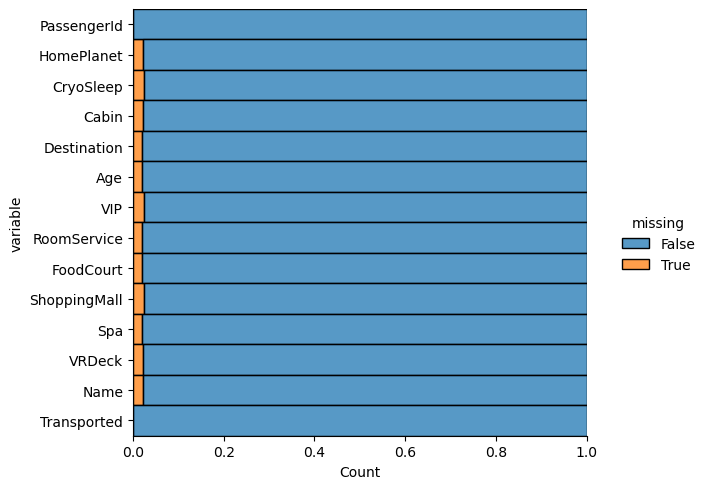

In [216]:
plt.figure(figsize=(8,6))
sns.displot(
    data=TrainData.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing missing data using barplot distplot.png", dpi=100)


In [217]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [218]:
TestData.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Figure size 800x600 with 0 Axes>

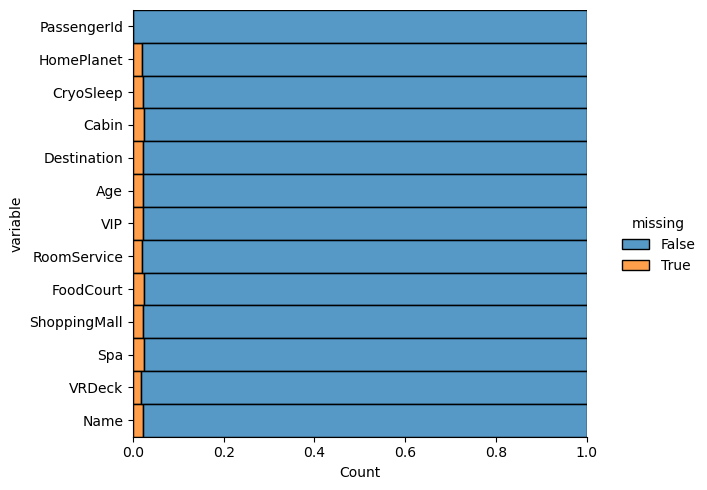

In [219]:
plt.figure(figsize=(8,6))
sns.displot(
    data=TestData.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing missing data using barplot distplot.png", dpi=100)


In [220]:
TrainTest=TrainData.append(TestData)

C:\Users\91807\AppData\Local\Temp\ipykernel_21416\3948789579.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainTest=TrainData.append(TestData)


In [221]:
TrainTest.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

<Figure size 800x600 with 0 Axes>

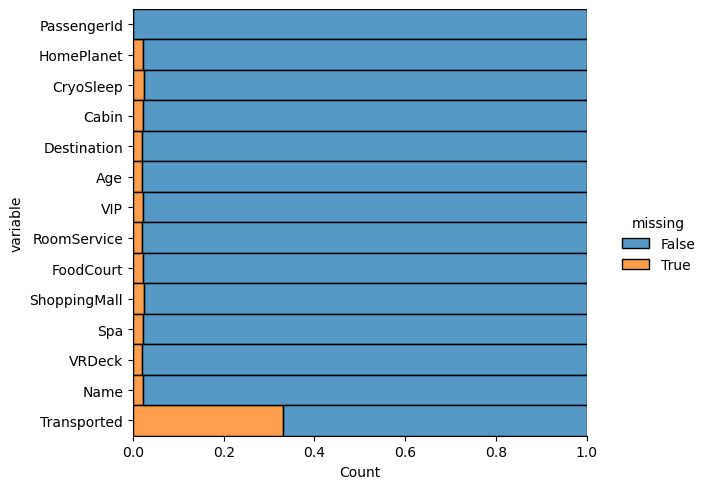

In [222]:
plt.figure(figsize=(8,6))
sns.displot(
    data=TrainTest.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing missing data using barplot distplot.png", dpi=100)


In [223]:
Expenses = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [224]:
TrainTest.loc[:,Expenses]=TrainTest.apply(lambda x: 0 if x.CryoSleep == True else x,axis =1)

In [225]:
TrainTest['Expenses'] = TrainTest.iloc[:,7:12].sum(axis=1)

In [226]:
TrainTest.loc[:,['CryoSleep']]=TrainTest.apply(lambda x: True if x.Expenses ==0 and pd.isna(x.CryoSleep) else x,axis =1)

In [227]:
TrainTest.Name = TrainTest.Name.fillna('Unknown Unknown')

In [228]:
TrainTest.loc[:,['Room']] = TrainTest.PassengerId.apply(lambda x: x[0:4] )

VIPG=TrainTest.loc[:,['Room','VIP']].dropna().drop_duplicates('Room')
CabinG=TrainTest.loc[:,['Room','Cabin']].dropna().drop_duplicates('Room')
HomePlanetG=TrainTest.loc[:,['Room','HomePlanet']].dropna().drop_duplicates('Room')
DestinationG=TrainTest.loc[:,['Room','Destination']].dropna().drop_duplicates('Room')
TrainTest=pd.merge(TrainTest,CabinG,how="left",on='Room',suffixes=('','_y'))
TrainTest=pd.merge(TrainTest,VIPG,how="left",on='Room',suffixes=('','_y'))
TrainTest=pd.merge(TrainTest,HomePlanetG,how="left",on='Room',suffixes=('','_y'))
TrainTest=pd.merge(TrainTest,DestinationG,how="left",on='Room',suffixes=('','_y'))

In [229]:
TrainTest.loc[:,['VIP']]=TrainTest.apply(lambda x: x.VIP_y if pd.isna(x.VIP) else x,axis=1)
TrainTest.loc[:,['Cabin']]=TrainTest.apply(lambda x:  x.Cabin_y if pd.isna(x.Cabin) else x,axis=1)
TrainTest.loc[:,['HomePlanet']]=TrainTest.apply(lambda x:  x.HomePlanet_y if pd.isna(x.HomePlanet) else x,axis=1)
TrainTest.loc[:,['Destination']]=TrainTest.apply(lambda x:  x.Destination_y if pd.isna(x.Destination) else x,axis=1)

In [230]:
TrainTest[TrainTest.Cabin.isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenses,Room,Cabin_y,VIP_y,HomePlanet_y,Destination_y
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,908.0,0012,NaN,False,Earth,TRAPPIST-1e
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,0.0,0101,NaN,False,Mars,TRAPPIST-1e
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,1048.0,0239,NaN,False,Mars,TRAPPIST-1e
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,False,0.0,0301,NaN,False,Earth,TRAPPIST-1e
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,4947.0,0310,NaN,False,Europa,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,9058_01,Mars,False,NaN,TRAPPIST-1e,38.0,NaN,784.0,0.0,42.0,38.0,10.0,Hammet Muff,NaN,874.0,9058,NaN,NaN,Mars,TRAPPIST-1e
12902,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,3888.0,9138,NaN,False,Europa,TRAPPIST-1e
12941,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,Weessh Sun,NaN,0.0,9223,NaN,False,Mars,TRAPPIST-1e
12942,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,0.0,9223,NaN,False,Mars,TRAPPIST-1e


In [231]:
TrainTest.isnull().sum()


PassengerId         0
HomePlanet        157
CryoSleep         174
Cabin             162
Destination       154
Age               270
VIP               172
RoomService       170
FoodCourt         180
ShoppingMall      175
Spa               177
VRDeck            177
Name                0
Transported      4277
Expenses            0
Room                0
Cabin_y           162
VIP_y             172
HomePlanet_y      157
Destination_y     154
dtype: int64

In [232]:
TrainTest.loc[:,['Cabin_1']] = TrainTest.Cabin.str.split("/",expand=True).iloc[:,0]
TrainTest.loc[:,['Cabin_3']] = TrainTest.Cabin.str.split("/",expand=True).iloc[:,2]
TrainTest

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Expenses,Room,Cabin_y,VIP_y,HomePlanet_y,Destination_y,Cabin_1,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,0001,B/0/P,False,Europa,TRAPPIST-1e,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,0002,F/0/S,False,Earth,TRAPPIST-1e,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,0003,A/0/S,True,Europa,TRAPPIST-1e,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,0003,A/0/S,True,Europa,TRAPPIST-1e,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,0004,F/1/S,False,Earth,TRAPPIST-1e,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,NaN,0.0,9266,F/1796/S,False,Earth,TRAPPIST-1e,G,S
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,NaN,1018.0,9269,NaN,False,Earth,TRAPPIST-1e,NaN,None
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Jayrin Pore,NaN,0.0,9271,D/296/P,False,Mars,55 Cancri e,D,P
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Kitakan Conale,NaN,3203.0,9273,D/297/P,False,Europa,NaN,D,P


In [233]:
numb_imp = SimpleImputer(strategy='mean')
cate_imp = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder (handle_unknown='ignore')

numb_transformer = Pipeline(steps=[('impute', numb_imp)])

cate_transformer = Pipeline(steps=[
    ('impute', cate_imp),
    ('onehot', ohe)])

numb_cols = ['Age','Expenses','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cate_cols = ['HomePlanet','CryoSleep','VIP','Cabin_3','Cabin_1']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numb_transformer, numb_cols),
        ('cut', cate_transformer, cate_cols)])

In [234]:
TrainSet = TrainTest[TrainTest['Transported'].notnull()].copy()
TrainSet.Transported =TrainSet.Transported.astype('bool')
TestSet = TrainTest[TrainTest['Transported'].isnull()].drop("Transported",axis=1)

In [235]:
X=TrainSet.drop('Transported',axis=1)
y = TrainSet.Transported

In [236]:
DTreeModel = DecisionTreeClassifier()
DTreePipeLine = Pipeline (steps=[
('preprocessor',preprocessor),
('model',DTreeModel)])
print(cross_val_score(DTreePipeLine, X, y,cv = 5, scoring = 'accuracy').mean())

0.7455430187183486


In [237]:
LogregModel = LogisticRegression()
LogregPipeLine = Pipeline (steps=[
('preprocessor',preprocessor),
('model',DTreeModel)])
print(cross_val_score(LogregPipeLine, X, y,cv = 5, scoring = 'accuracy').mean())

0.7460041781614634


In [238]:
XGBModel = XGBClassifier(n_estimators=100, learning_rate = 0.13, n_jobs=4)
XGBPipeLine = Pipeline (steps=[
('preprocessor',preprocessor),
('model',XGBModel)])
print(cross_val_score(XGBPipeLine, X, y,cv = 5, scoring = 'accuracy').mean())

0.8027167313728046


In [239]:
XGBPipeLine.fit(X,y)
prediction = XGBPipeLine.predict(TestSet)

output = pd.DataFrame({'PassengerId': TestSet.PassengerId,
                       'Transported': prediction})
output['Transported']=output['Transported'].astype('bool')
output.to_csv('submissionspaceship.csv', index=False)